### 목표
- 패션 이미지 데이터(10가지)를 분류하는 모델을 만들어보자!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 학습용 패션 이미지 데이터 로드
from tensorflow.keras.datasets import fashion_mnist

In [3]:
data = fashion_mnist.load_data()
data

4423680/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(X_train, y_train), (X_test, y_test) = data

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


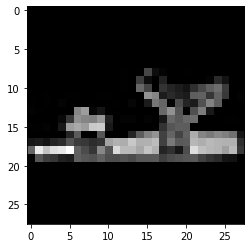

In [7]:
plt.imshow(X_train[59999], cmap='gray');

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(X_train,
                                                                  y_train_one_hot,
                                                                  random_state=5
                                                                 )

In [12]:
X_train.shape, X_val.shape

((45000, 28, 28), (15000, 28, 28))

#### 신경망 설계

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Flatten : 데이터를 1차원으로 자동적으로 펴주는 라이브러리

In [14]:
model = Sequential()

# Flatten 명령을 통해 한번에 바로 이미지 데이터를 1차원으로 펴서 신경망에 넣어줌
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 1,336,610
Trainable params: 1,336,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc']
             )

In [16]:
h = model.fit(X_train, y_train_one_hot,
              validation_data = (X_val, y_val_one_hot),
              epochs=30,
              batch_size=256
             )

Epoch 1/30
176/176 [==============================] - 5s 30ms/step - loss: 12.1563 - acc: 0.7159 - val_loss: 0.8000 - val_acc: 0.7967
Epoch 2/30
176/176 [==============================] - 5s 30ms/step - loss: 0.7563 - acc: 0.8148 - val_loss: 0.7298 - val_acc: 0.8128
Epoch 3/30
176/176 [==============================] - 5s 27ms/step - loss: 0.5718 - acc: 0.8358 - val_loss: 0.6514 - val_acc: 0.8265
Epoch 4/30
176/176 [==============================] - 5s 28ms/step - loss: 0.4539 - acc: 0.8564 - val_loss: 0.4724 - val_acc: 0.8489
Epoch 5/30
176/176 [==============================] - 5s 29ms/step - loss: 0.3823 - acc: 0.8708 - val_loss: 0.4232 - val_acc: 0.8654
Epoch 6/30
176/176 [==============================] - 5s 29ms/step - loss: 0.3604 - acc: 0.8763 - val_loss: 0.4873 - val_acc: 0.8406
Epoch 7/30
176/176 [==============================] - 5s 30ms/step - loss: 0.3161 - acc: 0.8896 - val_loss: 0.4636 - val_acc: 0.8485
Epoch 8/30
176/176 [==============================] - 5s 27ms/step -

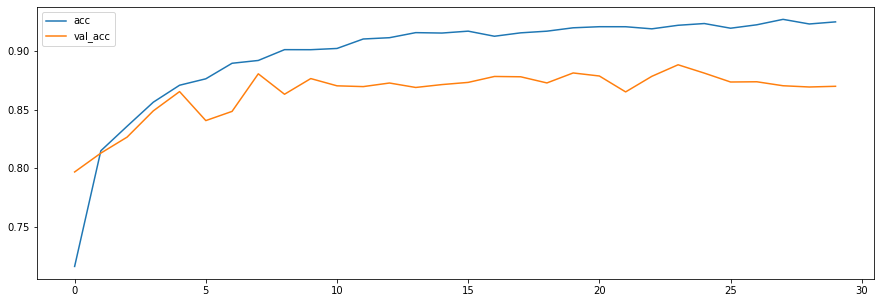

In [17]:
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'],
         label='acc'
        )

plt.plot(h.history['val_acc'],
         label='val_acc'
        )

plt.legend()
plt.show()

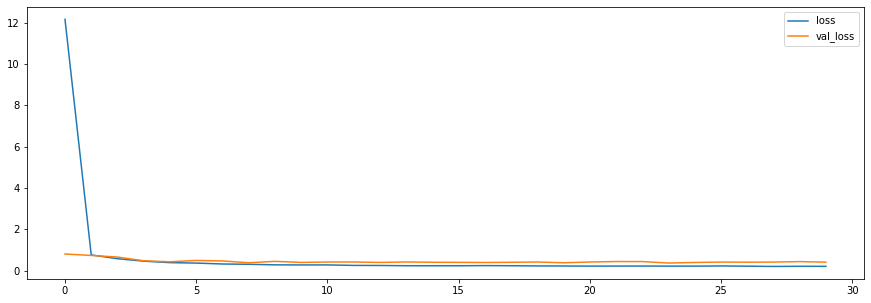

In [18]:
plt.figure(figsize=(15,5))

plt.plot(h.history['loss'],
         label='loss'
        )

plt.plot(h.history['val_loss'],
         label='val_loss'
        )

plt.legend()
plt.show()

In [19]:
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 4ms/step - loss: 0.4411 - acc: 0.8654


[0.44113004207611084, 0.8654000163078308]